In [1]:
 import keras
from keras.models import  Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import regularizers

from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [7]:
base_model = InceptionV3(include_top = False, weights='imagenet', input_shape= (551,1117,3))

87916544/87910968 [==============================] - 6s 0us/step


In [0]:
import os
os.chdir('drive/SOP')

In [6]:
!ls

100epochs_3channel.h5  data_s_gen.h5		  Testdata_SigComp2011
data_1.h5	       data_siamese_forge.pickle  trainingSet
data.h5		       data_siamese_gen.pickle	  tranfer_20ep_l2+dropout.h5
data_s_forge1	       data_siamese.h5		  tranfer_20ep_l2reg.h5
data_s_forge1.h5       data_siamese.pickle	  tranfer_20ep_overfit.h5
data_s_gen1	       model.ipynb		  trial.ipynb
data_s_gen1.h5	       mycode.ipynb


In [0]:
import numpy as np
from PIL import Image
import pickle
import os
import pickle
import cv2

In [0]:
def Center(img, new_height, new_width):
    cImg = 255*np.ones((new_height,new_width,1))
    width =  np.size(img,1)
    height = np.size(img,0)

    left = int((new_width - width)/2.)
    top = int(((new_height - height)/2.))
    right = int(((width + new_width)/2.))
    bottom = int(((height + new_height)/2.))
    cImg[top:bottom, left:right,:] = img
    return cImg

In [0]:
path = os.listdir('trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Forgeries')
path.sort(key = lambda item: item[5:7])

In [0]:
str.split?

In [46]:
path

['0109001_8.png',
 '0116001_1.png',
 '0116001_6.png',
 '0116001_8.png',
 '0109001_1.png',
 '0109001_6.png',
 '0113001_11.png',
 '0116001_11.png',
 '0113001_4.png',
 '0113001_3.png',
 '0109001_11.png',
 '0109001_3.png',
 '0109001_4.png',
 '0116001_3.png',
 '0116001_4.png',
 '0113001_10.png',
 '0109001_12.png',
 '0109001_7.png',
 '0116001_9.png',
 '0116001_7.png',
 '0109001_9.png',
 '0113001_2.png',
 '0116001_10.png',
 '0113001_5.png',
 '0116001_5.png',
 '0116001_2.png',
 '0109001_5.png',
 '0109001_2.png',
 '0109001_10.png',
 '0113001_12.png',
 '0113001_8.png',
 '0113001_6.png',
 '0113001_1.png',
 '0116001_12.png',
 '0113001_7.png',
 '0113001_9.png',
 '0116002_8.png',
 '0103002_2.png',
 '0109002_10.png',
 '0103002_11.png',
 '0116002_12.png',
 '0116002_9.png',
 '0109002_7.png',
 '0116002_7.png',
 '0103002_9.png',
 '0103002_13.png',
 '0103002_7.png',
 '0109002_11.png',
 '0103002_10.png',
 '0103002_3.png',
 '0103002_4.png',
 '0116002_6.png',
 '0116002_1.png',
 '0109002_8.png',
 '0109002_6.p

In [0]:
x1 = []

a = b = 0 
path = os.listdir('trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Forgeries/')
path.sort(key = lambda x: x[5:7])

for i in range(10):
  y = []
  for j in range(b,len(path)):
    if(path[j][5:7] == str(i+1).zfill(2)):
        img = cv2.imread('trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Forgeries/'+path[j]+'')
        img  = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        arr = np.asarray(img)
        arr = cv2.resize(arr,(1117,551),interpolation= cv2.INTER_AREA)
        y.append(arr)
        a = a + 1
        print(a)
        if(a==235):
          x1.append(np.asarray(y))
    else:
      print('...............')
      x1.append(np.asarray(y))
      b = a
      break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
...............
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
...............
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
...............
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
...............
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
...............
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
...............


In [26]:
x = []

a = b = 0 
path = os.listdir('trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Genuine/')
path.sort(key = lambda sample: sample[1:3])

for i in range(10):
  y = []
  for j in range(b,len(path)):
    if(path[j][1:3] == str(i+1).zfill(2)):
        img = cv2.imread('trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Genuine/'+path[j]+'')
        img  = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        arr = np.asarray(img)
        arr = cv2.resize(arr,(1117,551),interpolation= cv2.INTER_AREA)
        y.append(arr)
        a = a + 1
        print(a)
        if(a==235):
          x.append(np.asarray(y))
    else:
      print('...............')
      x.append(np.asarray(y))
      b = a
      break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
...............
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
...............
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
...............
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
...............
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
...............
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
...............
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
...............
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
...............
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
...............
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235


In [30]:
x1[0].shape

(36, 551, 1117)

In [33]:
len(x1)

10

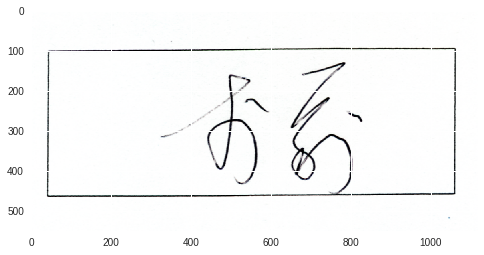

In [66]:
from matplotlib import pyplot as plt
plt.imshow(np.uint8(x[2][0]))
plt.show()

In [0]:
import pickle

In [0]:
x = np.asarray(x)
x1 = np.asarray(x1)

In [3]:
x.shape

NameError: ignored

In [0]:
hf = open('data_siamese_gen.pickle', 'wb')
pickle.dump(x,hf)
hf.close()

In [0]:
hf = open('data_siamese_forge.pickle', 'wb')
pickle.dump(x1,hf)
hf.close()

In [8]:
!ls

100epochs_3channel.h5  data_s_gen.h5		  Testdata_SigComp2011
data_1.h5	       data_siamese_forge.pickle  trainingSet
data.h5		       data_siamese_gen.pickle	  tranfer_20ep_l2+dropout.h5
data_s_forge1	       data_siamese.h5		  tranfer_20ep_l2reg.h5
data_s_forge1.h5       data_siamese.pickle	  tranfer_20ep_overfit.h5
data_s_gen1	       model.ipynb		  trial.ipynb
data_s_gen1.h5	       mycode.ipynb


In [7]:
import pickle
pickle_off = open("data_siamese.pickle","rb")
x = pickle.load(pickle_off)

EOFError: ignored

In [0]:
pickle_off = open("data_siamese_forge.pickle","rb")
forge = pickle.load(pickle_off)

In [0]:
from random import randint
import numpy as np

In [0]:
import h5py

In [0]:
hf = h5py.File('data_s_gen1','w')
gen = hf.get('dataset_1')
hf.close()

In [0]:
hf = h5py.File('data_s_forge1','w')
forge = hf.get('dataset_1')
hf.close()

In [0]:
gen = x
forge = x1

In [0]:
x = []
for i in range(10):
  for j in range(len(gen[i])):
    for l in range(10):
      y1 = []
      y1.append(gen[i][j])
      a = randint(0,len(gen[i])-1)
      y1.append(gen[i][a])
      k = randint(0,9)
      if(k == i):
        b = randint(0,len(forge[i])-1)
        y1.append(forge[i][b])
        y1 = np.asarray(y1)
      else:
        b = randint(0,len(gen[k])-1)
        y1.append(gen[k][b])
        y1 = np.asarray(y1)
      x.append(y1)      

In [42]:
len(x)

2350

In [0]:
x = np.asarray(x)

In [1]:
hf = open('data_siamese.pickle', 'wb')
pickle.dump(x,hf)
hf.close()

NameError: ignored

In [44]:
x.shape

(2350, 3, 551, 1117)

In [2]:
!ls

datalab  data_siamese.pickle  drive


In [0]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(128, activation='relu')(x)
# and a logistic layer -- let's say we have 10 classes
predictions = Dense(10, activation='softmax')(x)

In [0]:
m = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

m.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])  

In [0]:
import os 
os.chdir('drive/SOP')

In [1]:
!ls

datalab


In [0]:
hf = h5py.File('data_1.h5', 'r')

In [0]:
x = hf.get('dataset_1')
y = hf.get('dataset_2')

In [12]:
x[0].shape

(551, 1117, 3)

In [0]:
import numpy as np
x = np.asarray(x)
y = np.asarray(y)
p = np.random.permutation(x.shape[0])
x = x[p]
y = y[p]
X_train = x[0:200]
y_train = y[0:200]
X_val = x[200:226]
y_val = y[200:226]

In [17]:
model_info = m.fit(X_train, y_train, validation_data=(X_val, y_val), epochs= 20, batch_size= 32, verbose=2)

Train on 200 samples, validate on 26 samples
Epoch 1/20
 - 18s - loss: 0.8411 - acc: 0.8150 - val_loss: 14.2583 - val_acc: 0.1154
Epoch 2/20
 - 18s - loss: 0.8236 - acc: 0.8000 - val_loss: 14.2583 - val_acc: 0.1154
Epoch 3/20
 - 18s - loss: 0.7754 - acc: 0.9200 - val_loss: 14.1695 - val_acc: 0.1154
Epoch 4/20
 - 18s - loss: 0.7261 - acc: 0.9000 - val_loss: 14.2583 - val_acc: 0.1154
Epoch 5/20
 - 18s - loss: 0.6923 - acc: 0.8800 - val_loss: 14.2583 - val_acc: 0.1154
Epoch 6/20
 - 18s - loss: 0.7376 - acc: 0.8850 - val_loss: 14.2583 - val_acc: 0.1154
Epoch 7/20
 - 18s - loss: 0.6805 - acc: 0.8650 - val_loss: 14.2583 - val_acc: 0.1154
Epoch 8/20
 - 18s - loss: 0.6932 - acc: 0.9050 - val_loss: 14.2583 - val_acc: 0.1154
Epoch 9/20
 - 18s - loss: 0.6010 - acc: 0.9200 - val_loss: 14.2583 - val_acc: 0.1154
Epoch 10/20
 - 18s - loss: 0.5930 - acc: 0.8850 - val_loss: 14.2583 - val_acc: 0.1154
Epoch 11/20
 - 18s - loss: 0.5766 - acc: 0.9100 - val_loss: 14.2583 - val_acc: 0.1154
Epoch 12/20
 - 18s

In [0]:
m.save('tranfer_20ep_overfit.h5')

In [0]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
# and a logistic layer -- let's say we have 10 classes
predictions = Dense(10, activation='softmax',activity_regularizer= regularizers.l2(0.01))(x)

In [0]:
m = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

m.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])  

In [16]:
model_info = m.fit(X_train, y_train, validation_data=(X_val, y_val), epochs= 20, batch_size= 32, verbose=2)

Train on 200 samples, validate on 26 samples
Epoch 1/20
 - 36s - loss: 2.4759 - acc: 0.0900 - val_loss: 10.1964 - val_acc: 0.0769
Epoch 2/20
 - 19s - loss: 2.3462 - acc: 0.1400 - val_loss: 11.9389 - val_acc: 0.1923
Epoch 3/20
 - 19s - loss: 2.2220 - acc: 0.1950 - val_loss: 12.4373 - val_acc: 0.1154
Epoch 4/20
 - 19s - loss: 2.2395 - acc: 0.1750 - val_loss: 8.9694 - val_acc: 0.0769
Epoch 5/20


KeyboardInterrupt: ignored

In [0]:
m.save('tranfer_20ep_l2+dropout.h5')

In [34]:
!ls

100epochs_3channel.h5  model.ipynb   tranfer_20ep_l2+dropout.h5  trial.ipynb
data_1.h5	       mycode.ipynb  tranfer_20ep_l2reg.h5
data.h5		       trainingSet   tranfer_20ep_overfit.h5


In [14]:
 conv_activation = 'relu'
deep_activation = 'relu'

input_shape = (551, 1117, 3)
num_classes = 10

model = Sequential()

model.add(
	Conv2D(
		16,
		kernel_size=(8, 8),
		strides=(1, 1),
		activation=conv_activation,
		input_shape=input_shape,
		data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (16, 16), activation=conv_activation))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (16, 16), activation=conv_activation))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (16, 16), activation=conv_activation))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# model.add(Dense(100, activation=deep_activation))
model.add(Dense(100, activation=deep_activation))
model.add(Dense(50, activation=deep_activation))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])  

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 544, 1110, 16)     3088      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 272, 555, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 257, 540, 16)      65552     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 128, 270, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 113, 255, 16)      65552     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 127, 16)       0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 28, 63, 16)        0         
__________

In [15]:
model_info = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16, verbose=2)

Train on 200 samples, validate on 26 samples
Epoch 1/100
 - 34s - loss: 14.5063 - acc: 0.1000 - val_loss: 13.6384 - val_acc: 0.1538
Epoch 2/100
 - 22s - loss: 14.5063 - acc: 0.1000 - val_loss: 13.6384 - val_acc: 0.1538
Epoch 3/100
 - 22s - loss: 14.5063 - acc: 0.1000 - val_loss: 13.6384 - val_acc: 0.1538
Epoch 4/100
 - 22s - loss: 14.5063 - acc: 0.1000 - val_loss: 13.6384 - val_acc: 0.1538
Epoch 5/100
 - 22s - loss: 14.5063 - acc: 0.1000 - val_loss: 13.6384 - val_acc: 0.1538
Epoch 6/100
 - 22s - loss: 14.5063 - acc: 0.1000 - val_loss: 13.6384 - val_acc: 0.1538
Epoch 7/100
 - 22s - loss: 14.5063 - acc: 0.1000 - val_loss: 13.6384 - val_acc: 0.1538
Epoch 8/100
 - 22s - loss: 14.5063 - acc: 0.1000 - val_loss: 13.6384 - val_acc: 0.1538
Epoch 9/100
 - 22s - loss: 14.5063 - acc: 0.1000 - val_loss: 13.6384 - val_acc: 0.1538
Epoch 10/100
 - 22s - loss: 14.5063 - acc: 0.1000 - val_loss: 13.6384 - val_acc: 0.1538
Epoch 11/100
 - 22s - loss: 14.5063 - acc: 0.1000 - val_loss: 13.6384 - val_acc: 0.1

Epoch 34/100
 - 22s - loss: 14.5063 - acc: 0.1000 - val_loss: 13.6384 - val_acc: 0.1538
Epoch 35/100
 - 22s - loss: 14.5063 - acc: 0.1000 - val_loss: 13.6384 - val_acc: 0.1538
Epoch 36/100
 - 22s - loss: 14.5063 - acc: 0.1000 - val_loss: 13.6384 - val_acc: 0.1538
Epoch 37/100
 - 22s - loss: 14.5063 - acc: 0.1000 - val_loss: 13.6384 - val_acc: 0.1538
Epoch 38/100
 - 22s - loss: 14.5063 - acc: 0.1000 - val_loss: 13.6384 - val_acc: 0.1538
Epoch 39/100
 - 22s - loss: 14.5063 - acc: 0.1000 - val_loss: 13.6384 - val_acc: 0.1538
Epoch 40/100
 - 22s - loss: 14.5063 - acc: 0.1000 - val_loss: 13.6384 - val_acc: 0.1538
Epoch 41/100
 - 22s - loss: 14.5063 - acc: 0.1000 - val_loss: 13.6384 - val_acc: 0.1538
Epoch 42/100
 - 22s - loss: 14.5063 - acc: 0.1000 - val_loss: 13.6384 - val_acc: 0.1538
Epoch 43/100
 - 22s - loss: 14.5063 - acc: 0.1000 - val_loss: 13.6384 - val_acc: 0.1538
Epoch 44/100
 - 22s - loss: 14.5063 - acc: 0.1000 - val_loss: 13.6384 - val_acc: 0.1538
Epoch 45/100
 - 22s - loss: 14.5

KeyboardInterrupt: ignored

In [0]:
model.save('100epochs_3channel.h5')

In [17]:
!ls

100epochs_3channel.h5  data.h5	    mycode.ipynb  trial.ipynb
data_1.h5	       model.ipynb  trainingSet
